In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
qb = pd.read_csv('input/qb/dk_qb_stats.csv')

In [5]:
rodgers = qb[qb['Player']=='Aaron Rodgers']

In [9]:
rodgers.columns

Index(['Player', 'Team', 'Week', 'Opp', 'Comp', 'Att', 'Pct', 'Yds', 'Yds/Att',
       'TD', 'Int', 'ru_att', 'ru_yds', 'yds/ru_att', 'ru_td', 'points',
       'year'],
      dtype='object')

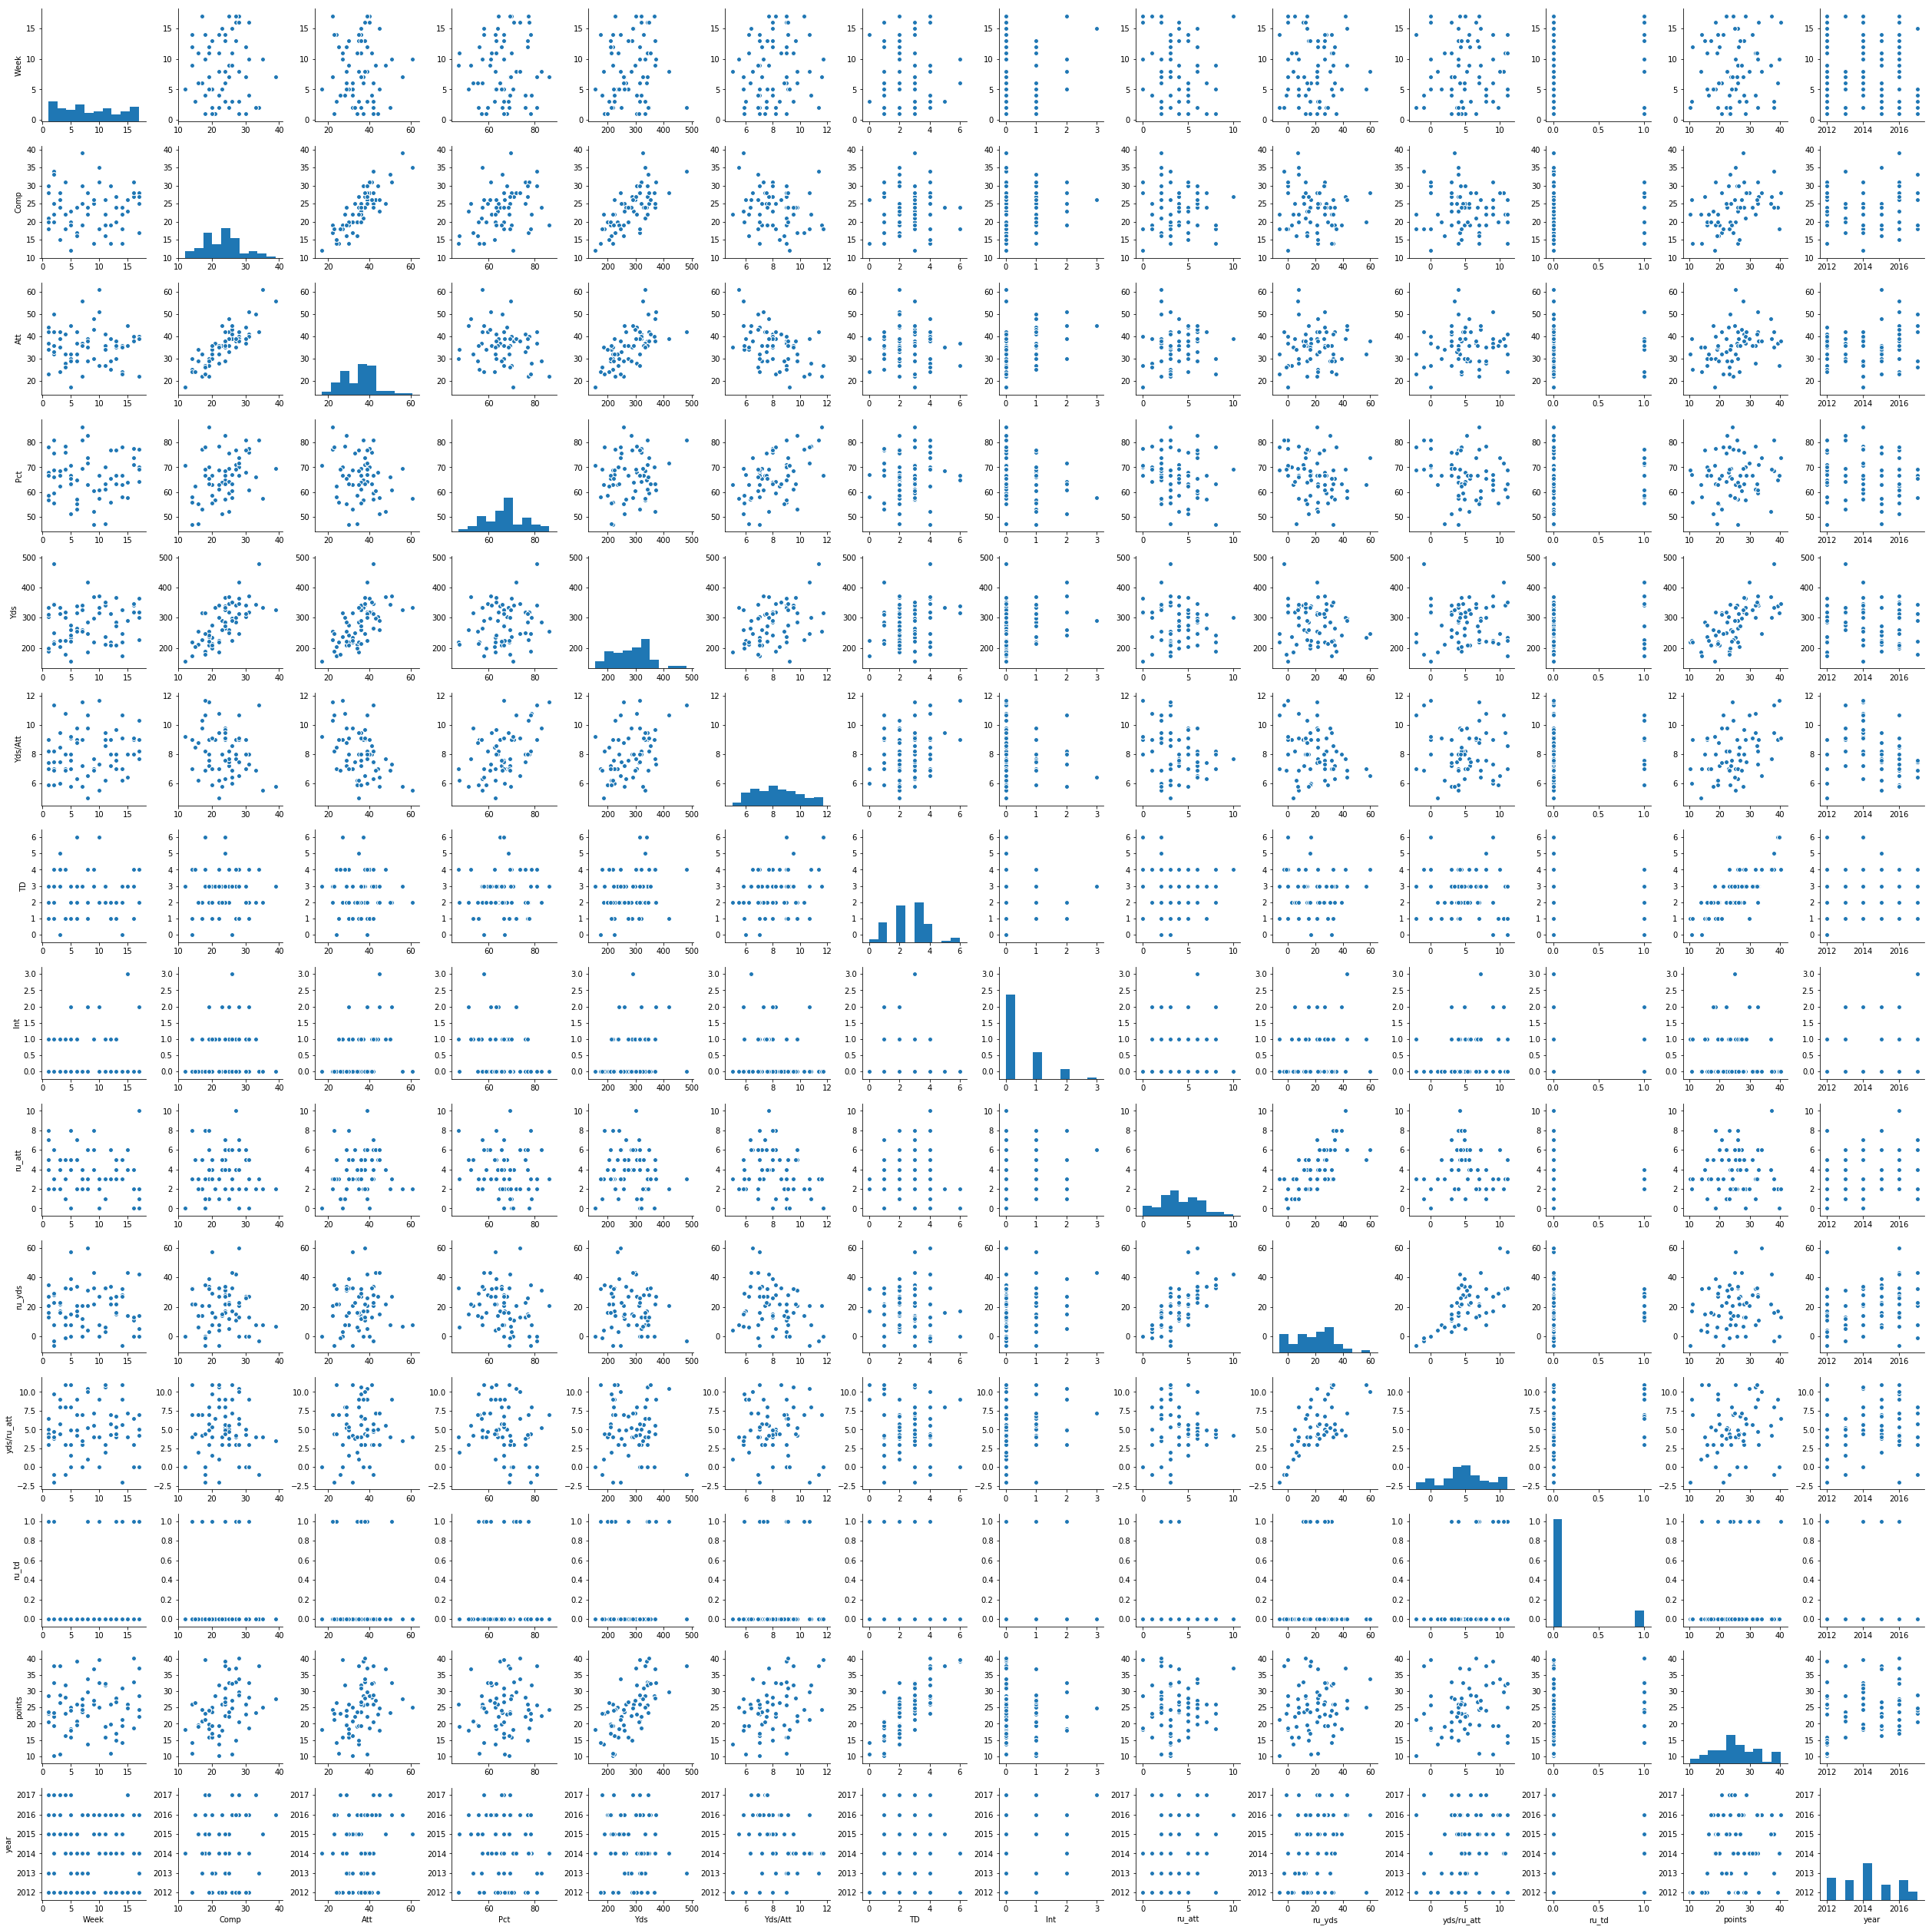

In [8]:
sns.pairplot(rodgers)

In [19]:
points = rodgers['points']

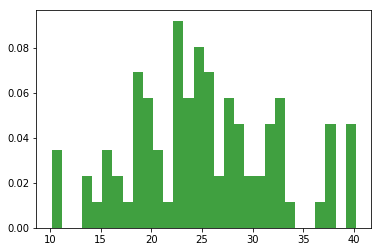

In [23]:
n, bins, patches = plt.hist(points, 30, density=True, facecolor='g', alpha=0.75)
